## BMI Index Analysis

---

###### Import require modules:

In [1]:
import pandas as pd
import seaborn as sbn
import pandas_profiling
from sklearn.svm import SVC
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---

###### Read data from the csv file and store it in the pandas dataframe:

In [2]:
df = pd.read_csv("BMI-Data.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


---

###### Get information about this dataset:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 13.7+ KB


---

###### See the data description:

In [4]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


---

###### Display the correlation between features:

In [5]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


---

###### Checking number of unique rows in each feature:

In [6]:
df.nunique()

Gender      2
Height     60
Weight    110
Index       6
dtype: int64

---

###### Set label for Index feature values:

In [7]:
labels = ["Very Thin", "Thin", "Normal", "Overweight", "Fat", "Very Fat"]
temp = {}
for i, j in enumerate(sorted(df["Index"].unique())):
    temp[j] = labels[i]
df["Index"] = df["Index"].map(temp)
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,Fat
1,Male,189,87,Normal
2,Female,185,110,Fat
3,Female,195,104,Overweight
4,Male,149,61,Overweight


---

###### Display the scatter percentage of each index:

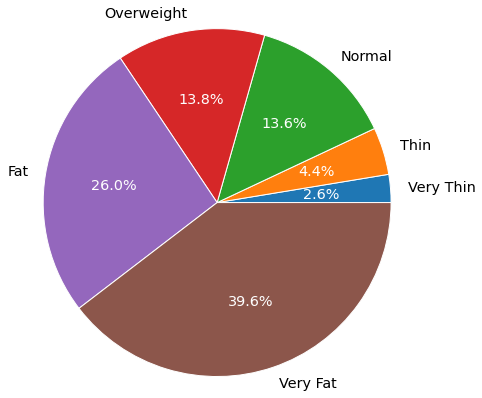

In [8]:
patches, texts, pcts = plt.pie(df["Index"].value_counts().sort_values(), labels=labels, autopct="%1.1f%%", radius=2, wedgeprops={"linewidth": 1, "edgecolor": "white"}, textprops={"size": "x-large"})
plt.setp(pcts, color="white")
plt.show()

---

###### Display density in height and weight features:

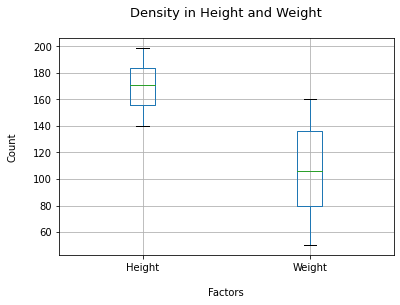

In [9]:
chart = df.boxplot(column=["Height", "Weight"])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Density in Height and Weight\n", fontsize=13)
plt.xlabel("\nFactors")
plt.ylabel("Count\n")
plt.show()

---

###### Display average of height and weight based on index and gender:

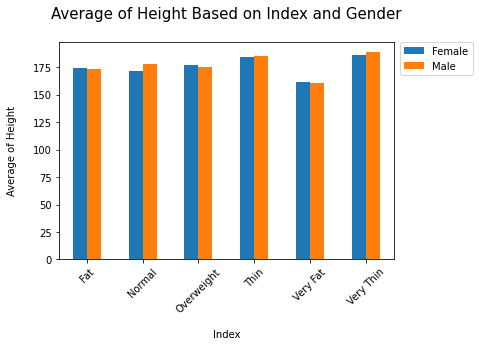

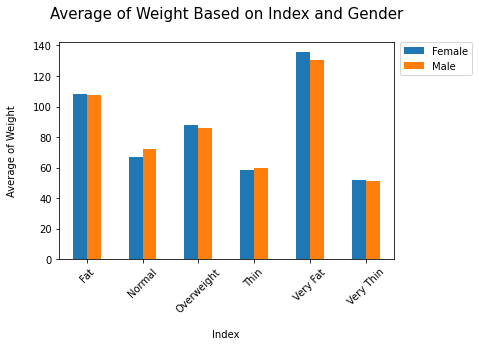

In [10]:
features = ["Height", "Weight"]
for feature in features:
    chart = df.groupby(["Index", "Gender"])[feature].mean().unstack().plot(kind="bar")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    plt.title(f"Average of {feature} Based on Index and Gender\n", fontsize=15)
    plt.xlabel("\nIndex")
    plt.ylabel(f"Average of {feature}\n")
    plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
    plt.show()

---

###### Display the relationship between all the features:

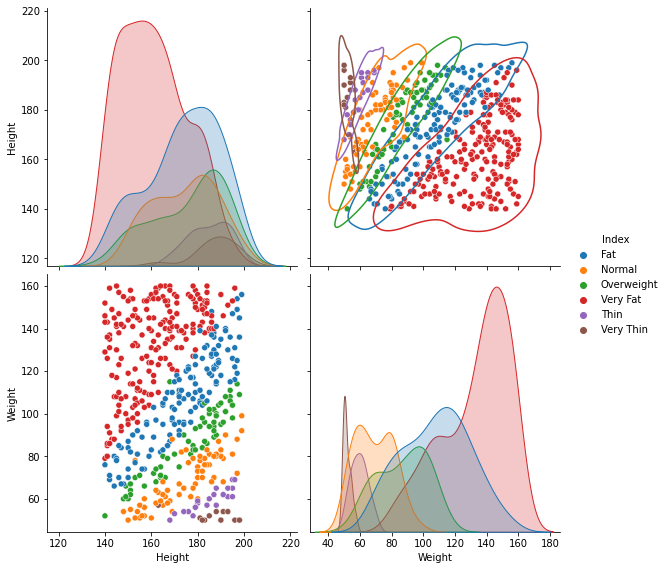

In [11]:
g = sbn.pairplot(df, hue="Index", height=4)
g.map_upper(sbn.kdeplot, levels=1)
plt.show()

---

###### We can also get complete and comprehensive information and related diagrams in a frame (Note: This report may not appear in GitHub, but it appears in IDEs like VSCode):

In [12]:
pandas_profiling.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


---

###### Handling categorical data:

In [13]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Index"] = le.fit_transform(df["Index"])

---

###### Set X & y and split them to train and test data, create several classification models, get predict from them and calculate accuracy of each algorithm:

In [14]:
X = df[["Gender", "Height", "Weight"]]
y = df["Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classificationModels = [
    GaussianNB(),
    AdaBoostClassifier(),
    LogisticRegression(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel="rbf", C=1, gamma=0.1),
    KNeighborsClassifier(n_neighbors=100),
    RandomForestClassifier(n_estimators=100),
    DecisionTreeClassifier(criterion="gini", max_depth=4)
]
parameters = ["Accuracy", "Algorithm"]
modelsData = pd.DataFrame(columns=parameters)
for model in classificationModels:
    model.fit(X_train, y_train)
    forecasts = model.predict(X_test)
    modelAccuracy = accuracy_score(y_test, forecasts)
    name = model.__class__.__name__
    newModelData = pd.DataFrame([[modelAccuracy*100, name]], columns=parameters)
    modelsData = modelsData.append(newModelData)

C:\Users\Gold\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

###### Find the best algorithm based on accuracy according to the related diagram:

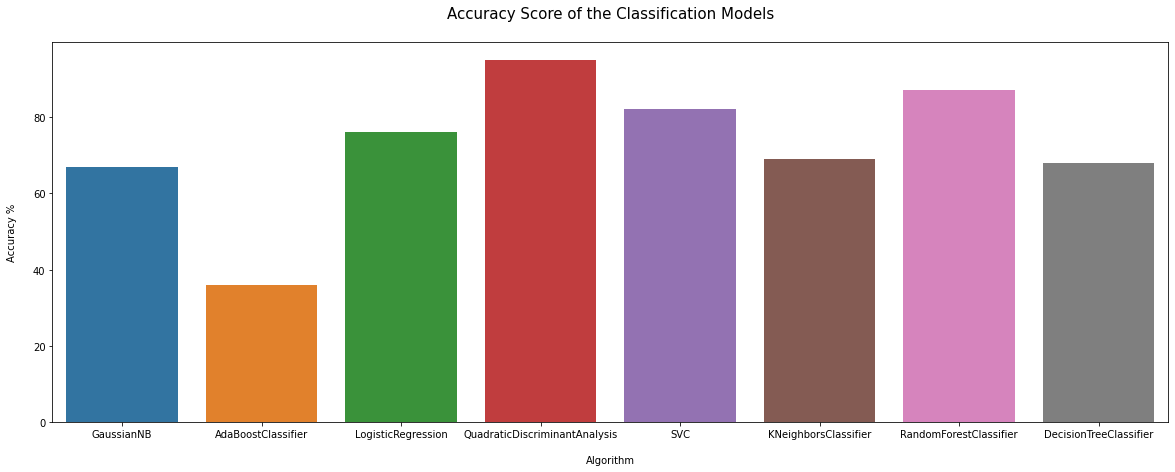

In [15]:
plt.figure(figsize=(20, 7))
sbn.set_color_codes("muted")
sbn.barplot(x="Algorithm", y="Accuracy", data=modelsData)
plt.title("Accuracy Score of the Classification Models\n", fontsize=15)
plt.xlabel("\nAlgorithm")
plt.ylabel("Accuracy %\n")
plt.show()

###### As shown in the above diagram, the best algorithm for this dataset is Quadratic Discriminant Analysis.

---

###### Set the best model and display the confusion matrix:

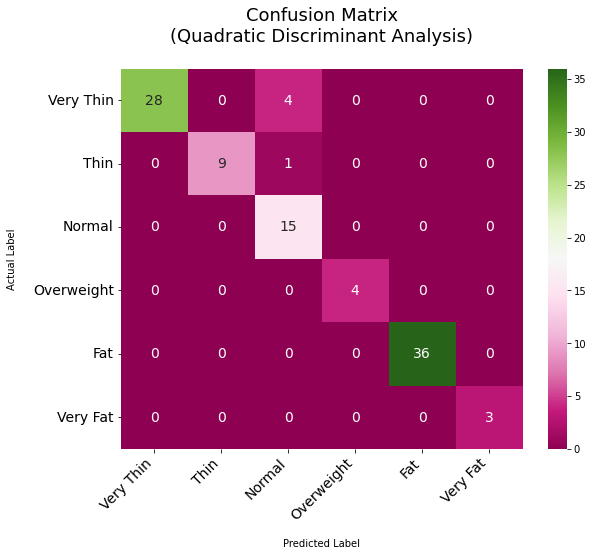

In [16]:
model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
forecasts = model.predict(X_test)
confusionMatrix = pd.DataFrame((confusion_matrix(y_test, forecasts)),
                               ("Very Thin", "Thin", "Normal", "Overweight", "Fat", "Very Fat"),
                               ("Very Thin", "Thin", "Normal", "Overweight", "Fat", "Very Fat"))
plt.figure(figsize=(9, 7))
heatmap = sbn.heatmap(confusionMatrix, annot=True, annot_kws={"size": 14}, fmt='d', cmap="PiYG")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha="right", fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha="right", fontsize=14)
plt.title("Confusion Matrix\n(Quadratic Discriminant Analysis)\n", fontsize=18)
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.show()

---

###### Display the report:

In [17]:
report = classification_report(y_test, forecasts)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       1.00      0.90      0.95        10
           2       0.75      1.00      0.86        15
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00         3

    accuracy                           0.95       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.95      0.95       100



---

## End